In [1]:
import numpy as np
import matplotlib.pyplot as plt
from aeons.endpoint import EndModel, theta_basic, theta_bandwidth, theta_bandwidth_trunc
from aeons.utils import *
from aeons.plotting import plot_std, plot_lx, plot_logLx, plot_split
from aeons.regress import GaussianRegress
from aeons.likelihoods import full

In [ ]:
# write_to_txt("planck/bt_start_25.txt", [iterations, logXfs, logXfs_std])
# iterations, logXfs, logXfs_std = read_from_txt('planck_gaussian/basic_full.txt')

## Planck gaussian

In [43]:
samples = pickle_in(f"{aeons_dir}/samples/toy/cauchy_10_0001.pickle")

In [44]:
model = EndModel(samples)

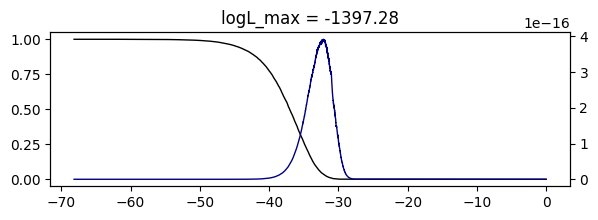

In [47]:
plot_lx(pickle_in(f"{aeons_dir}/samples/toy/planck.pickle"))

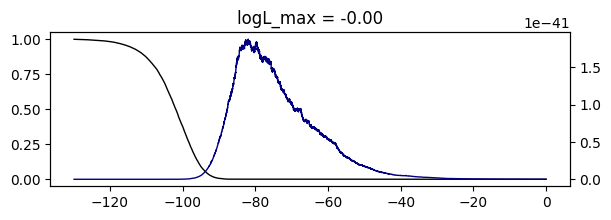

In [45]:
plot_lx(samples)

In [30]:
samples = pickle_in(f"{aeons_dir}/samples/toy/planck.pickle")
model = EndModel(samples)
true_endpoint = model.true_endpoint()
true_logXf = model.true_logXf()

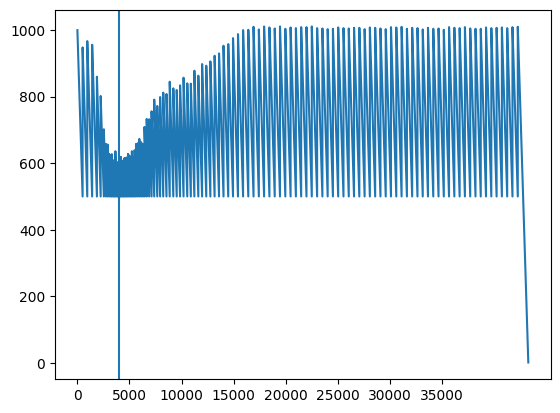

In [34]:
samples.nlive.plot(xticks=np.arange(0, 40000, 5000))
plt.axvline(x=4000)

In [42]:
true_endpoint

27474

<Axes: xlabel='beta'>

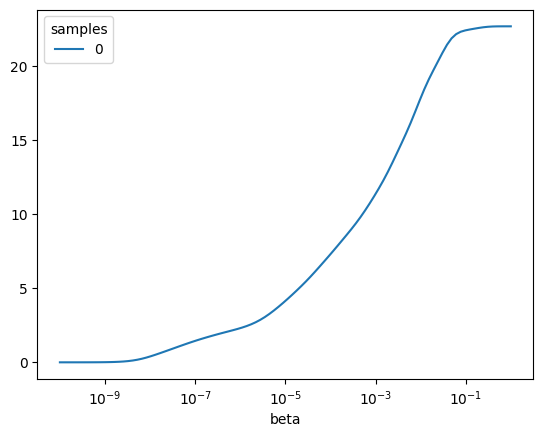

In [41]:
points = points_at_iteration(samples, ndead=10000)
beta = np.logspace(-10, 0, 100)
D_KL = points.D_KL(nsamples=1, beta=np.logspace(-10, 0, 100))
D_KL.unstack('samples').plot(logx=True)

In [ ]:
points

Fit over all the live points. Low uncertainty because fitting over box prior too.

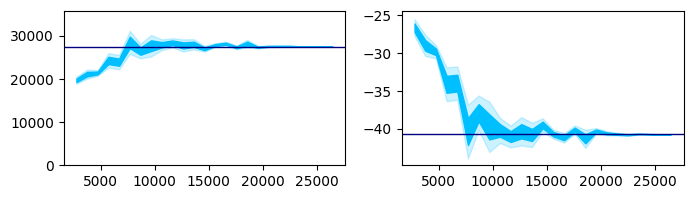

In [3]:
fig, axs = plt.subplots(1, 2, figsize=(8, 2))
iterations, logXfs, logXfs_std, true_endpoint = read_from_txt('planck_gaussian/basic_full.txt')
logXs = samples.logX().iloc[iterations]
endpoints, endpoints_std = calc_endpoints(iterations, logXs, logXfs, logXfs_std, nlive=750)
plot_std(iterations, endpoints, endpoints_std, true_endpoint, ylim=1.3, ax=axs[0])
plot_std(iterations, logXfs, logXfs_std, true_logXf, ylim=(true_logXf*1.1, true_logXf*0.6), ax=axs[1])

Doing bandwidth selection, larger uncertainty because box prior effects have been removed, broader range of Gaussians can be fit to the data.

At earliest iterations, likelihood is very prior dominated --> cannot remove, even with bandwidth

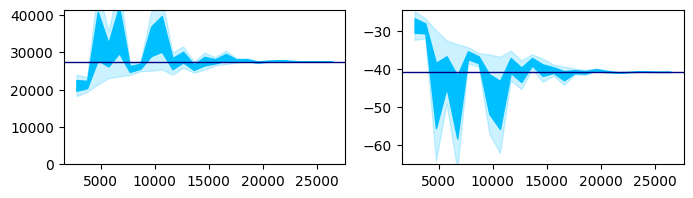

In [4]:
fig, axs = plt.subplots(1, 2, figsize=(8, 2))
iterations, logXfs, logXfs_std, true_endpoint = read_from_txt('planck_gaussian/bandwidth_trunc_full.txt')
logXs = samples.logX().iloc[iterations]
endpoints, endpoints_std = calc_endpoints(iterations, logXs, logXfs, logXfs_std, nlive=750)
plot_std(iterations, endpoints, endpoints_std, true_endpoint, ylim=1.5, ax=axs[0])
plot_std(iterations, logXfs, logXfs_std, true_logXf, ylim=(true_logXf*1.6, true_logXf*0.6), ax=axs[1])

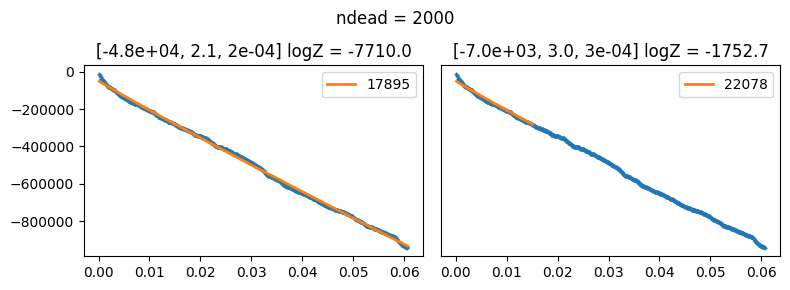

In [51]:
plot_split(model, ndead=2000, splits=4)

/home/zixiao/Documents/III/project/env/lib/python3.10/site-packages/anesthetic/labelled_pandas.py:22: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  results.append((f(*args), l))


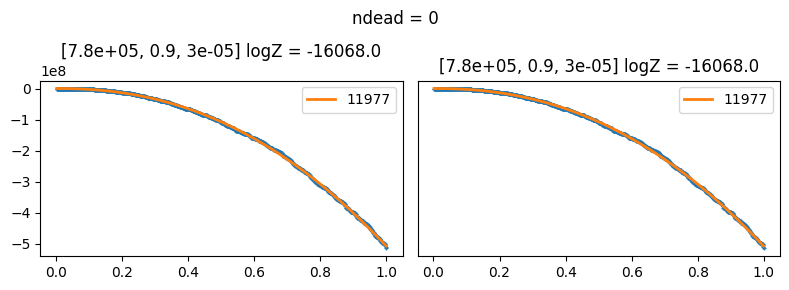

In [26]:
plot_split(model, ndead=0, splits=1)

#### Looking at just the start

Just the start, no selection

<Figure size 400x200 with 0 Axes>

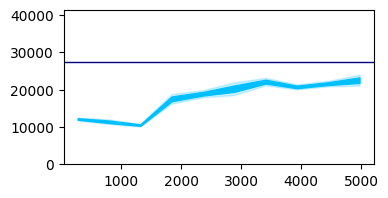

In [11]:
plt.figure(figsize=(4,2))
iterations, logXfs, logXfs_std, true_endpoint = read_from_txt('planck_gaussian/basic_start.txt')
logXs = samples.logX().iloc[iterations]
endpoints, endpoints_std = calc_endpoints(iterations, logXs, logXfs, logXfs_std, nlive=750)
plot_std(iterations, endpoints, endpoints_std, true_endpoint, ylim=1.5)

Looking at just the beginning, with selection

<Figure size 400x200 with 0 Axes>

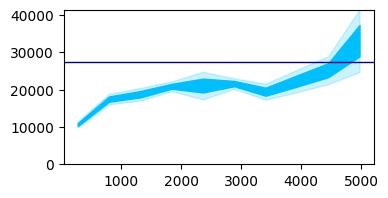

In [12]:
plt.figure(figsize=(4,2))
iterations, logXfs, logXfs_std, true_endpoint = read_from_txt('planck_gaussian/bandwidth_trunc_start.txt')
logXs = samples.logX().iloc[iterations]
endpoints, endpoints_std = calc_endpoints(iterations, logXs, logXfs, logXfs_std, nlive=750)
plot_std(iterations, endpoints, endpoints_std, true_endpoint, ylim=1.5)

### Plotting DKL etc

In [17]:
samples = pickle_in(f"{aeons_dir}/samples/toy/planck.pickle")
model = EndModel(samples)
true_endpoint = model.true_endpoint()
true_logXf = model.true_logXf()

In [25]:
ndead = 20000
points = points_at_iteration(samples, ndead)
samples.logX().iloc[ndead]

/home/zixiao/Documents/III/project/env/lib/python3.10/site-packages/anesthetic/labelled_pandas.py:22: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  results.append((f(*args), l))


-30.455537776342236

<Axes: xlabel='beta'>

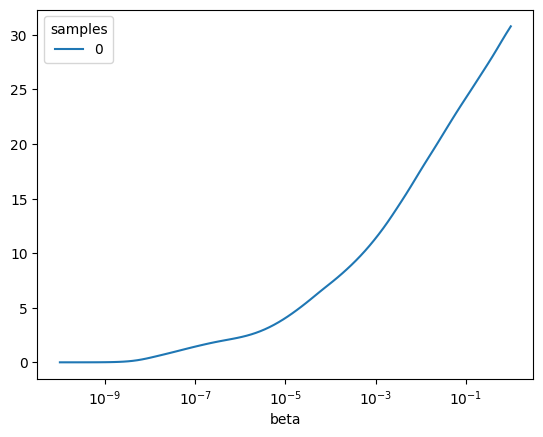

In [22]:
beta = np.logspace(-10, 0, 100)
D_KL = points.D_KL(nsamples=1, beta=np.logspace(-10, 0, 100))
D_KL.unstack('samples').plot(logx=True)

## Planck

In [2]:
name, samples = get_samples('lcdm', 'planck')
model = EndModel(samples)
true_endpoint = model.true_endpoint()
true_logXf = model.true_logXf()

In [21]:
iterations = np.linspace(0.01*true_endpoint, true_endpoint, 50, endpoint=False).astype(int)
logXfs, logXfs_std = model.logXfs(theta_bandwidth_trunc, iterations, Nset=25)

Iteration 573 complete, 21 samples
Iteration 1709 complete, 21 samples
Iteration 2845 complete, 15 samples
Iteration 3981 complete, 23 samples
Iteration 5117 complete, 21 samples
Iteration 6253 complete, 19 samples
Iteration 7389 complete, 20 samples
Iteration 8525 complete, 20 samples
Iteration 9661 complete, 19 samples
Iteration 10797 complete, 21 samples
Iteration 11933 complete, 19 samples
Iteration 13069 complete, 20 samples
Iteration 14205 complete, 17 samples
Iteration 15341 complete, 16 samples
Iteration 16477 complete, 17 samples
Iteration 17613 complete, 20 samples
Iteration 18749 complete, 21 samples
Iteration 19885 complete, 20 samples
Iteration 21021 complete, 19 samples
2 attempts
7 attempts
2 attempts
Iteration 22157 complete, 17 samples
Iteration 23293 complete, 20 samples
Iteration 24428 complete, 20 samples
4 attempts
2 attempts
2 attempts
2 attempts
2 attempts
5 attempts
4 attempts
Iteration 25564 complete, 16 samples
Iteration 26700 complete, 19 samples
3 attempts
4

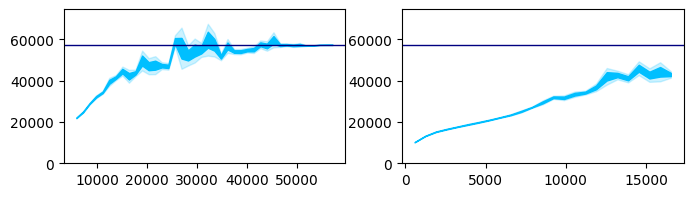

In [5]:
fig, axs = plt.subplots(1, 2, figsize=(8, 2))
iterations, endpoints, endpoints_std, _ = read_from_txt("../summer_1/lcdm_predictions_gauss/lcdm_planck_1.txt")
plot_std(iterations, endpoints, endpoints_std, true_endpoint, ylim=1.3, ax=axs[0])

iterations, logXfs, logXfs_std = read_from_txt("planck/basic_start_25.txt")
logXs = samples.logX().iloc[iterations]
endpoints, endpoints_std = calc_endpoints(iterations, logXs, logXfs, logXfs_std, nlive=1000)
plot_std(iterations, endpoints, endpoints_std, true_endpoint, ylim=1.3, ax=axs[1])

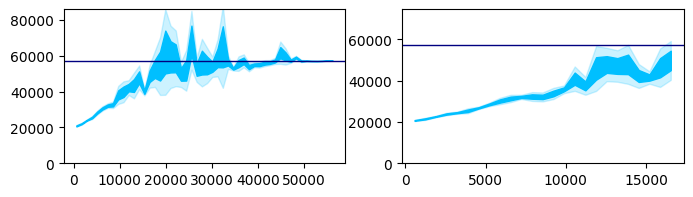

In [25]:
fig, axs = plt.subplots(1, 2, figsize=(8, 2))
iterations, logXfs, logXfs_std = read_from_txt("planck/bt_full_50.txt")
logXs = samples.logX().iloc[iterations]
endpoints, endpoints_std = calc_endpoints(iterations, logXs, logXfs, logXfs_std, nlive=1000)
plot_std(iterations, endpoints, endpoints_std, true_endpoint, ylim=1.5, ax=axs[0])
axs[0].set_xticks(np.arange(0, 60000, 10000))

iterations, logXfs, logXfs_std = read_from_txt("planck/bt_start_25.txt")
logXs = samples.logX().iloc[iterations]
endpoints, endpoints_std = calc_endpoints(iterations, logXs, logXfs, logXfs_std, nlive=1000)
plot_std(iterations, endpoints, endpoints_std, true_endpoint, ylim=1.3, ax=axs[1])

In [29]:
np.exp(samples.logX().iloc[5000])

0.4999500049994995

/home/zixiao/Documents/III/project/env/lib/python3.10/site-packages/anesthetic/labelled_pandas.py:22: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  results.append((f(*args), l))


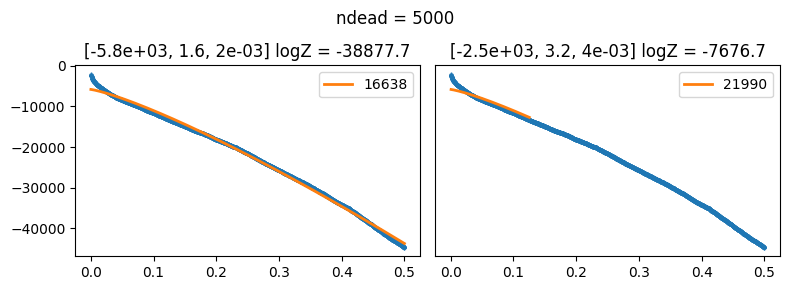

In [26]:
plot_split(model, ndead=5000, splits=4, trunc=5)

## **BAO**

Initial phase -- still dominated by prior and concave, Gaussian doesn't fit well

Intermediate stage -- still dominated by prior but linear, so Gaussian can fit well --> high confidence (evidence) despite poor prediction

In [2]:
name, samples = get_samples('lcdm', 'BAO')
model = EndModel(samples)
true_endpoint = model.true_endpoint()
true_logXf = model.true_logXf()

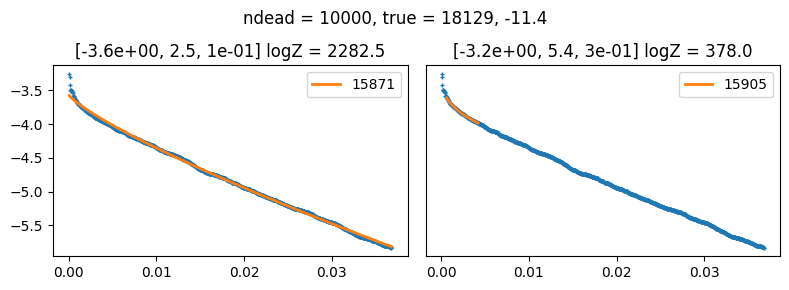

In [11]:
plot_split(model, ndead=10000, splits=10, trunc=15)

In [39]:
ndead = 1000
logLlive, Xlive, nk, logZdead = model.data(ndead, live=True)
Nset = 25
logXfs = np.zeros(Nset)
for i in range(Nset):
    X = generate_Xs(nk)
    theta = theta_bandwidth_trunc(logLlive, X[ndead:])
    logXfs[i] = logXf_formula(theta, logZdead, Xlive[0])
logXfs.mean(), logXfs.std()

(-10.905663367001702, 0.06162448102034774)

In [4]:
iterations = np.linspace(0.1*true_endpoint, true_endpoint, 25, endpoint=False).astype(int)
logXfs, logXfs_std = model.logXfs(theta_bandwidth_trunc, iterations, Nset=25)

/home/zixiao/Documents/III/project/env/lib/python3.10/site-packages/anesthetic/labelled_pandas.py:22: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  results.append((f(*args), l))


Iteration 1812 complete, 23 samples
Iteration 2465 complete, 20 samples
Iteration 3118 complete, 19 samples
Iteration 3770 complete, 18 samples
Iteration 4423 complete, 23 samples
Iteration 5076 complete, 21 samples
Iteration 5728 complete, 20 samples
Iteration 6381 complete, 22 samples
Iteration 7034 complete, 23 samples
Iteration 7686 complete, 24 samples
Iteration 8339 complete, 22 samples
Iteration 8991 complete, 17 samples
Iteration 9644 complete, 17 samples
Iteration 10297 complete, 17 samples
Iteration 10949 complete, 18 samples
Iteration 11602 complete, 18 samples
Iteration 12255 complete, 22 samples
Iteration 12907 complete, 21 samples
Iteration 13560 complete, 21 samples
Iteration 14213 complete, 21 samples
Iteration 14865 complete, 23 samples
Iteration 15518 complete, 19 samples
Iteration 16171 complete, 24 samples
Iteration 16823 complete, 19 samples
Iteration 17476 complete, 20 samples


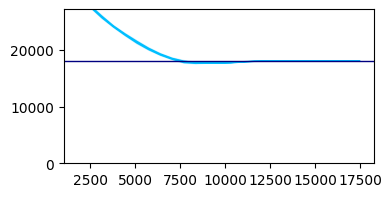

In [6]:
iterations, logXfs, logXfs_std = read_from_txt('BAO/bt_full_25.txt')
logXs = samples.logX().iloc[iterations]
nk = np.array(samples.nlive)
navgs = np.zeros_like(iterations)
for i, ndead in enumerate(iterations):
    navgs[i] = np.mean(nk[int(ndead):-1000])
endpoints, endpoints_std = calc_endpoints(iterations, logXs, logXfs, logXfs_std, navgs)
plot_std(iterations, endpoints, endpoints_std, true_endpoint, ylim=1.5)

In [13]:
samples.logX()[10000:]

       weights 
10000  0.735411    -3.302185
10001  0.734783    -3.303185
10002  0.736624    -3.304184
10003  0.735894    -3.305184
10004  0.735326    -3.306183
                     ...    
19126  0.003009   -16.727440
19127  0.003010   -16.950584
19128  0.003014   -17.238266
19129  0.003016   -17.643731
19130  0.003042   -18.336878
Name: logX, Length: 9131, dtype: float64

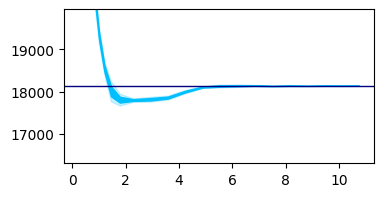

In [9]:
plot_std(-logXs, endpoints, endpoints_std, true_endpoint, ylim=(0.9*true_endpoint, 1.1*true_endpoint))

In [15]:
np.mean(nk[5000:-1000])

1609.3976087122078